In [23]:
import pandas as pd

df = pd.read_csv(r"C:\Users\chand\Downloads\Crime_Data_from.csv")
print(df.head())


       DR_NO         Date Rptd          DATE OCC  TIME OCC  AREA   AREA NAME  \
0  190326475  03-01-2020 00:00  03-01-2020 00:00      2130     7    Wilshire   
1  200106753  02-09-2020 00:00  02-08-2020 00:00      1800     1     Central   
2  200320258  11-11-2020 00:00  11-04-2020 00:00      1700     3   Southwest   
3  200907217  05-10-2023 00:00  03-10-2020 00:00      2037     9    Van Nuys   
4  200412582  09-09-2020 00:00  09-09-2020 00:00       630     4  Hollenbeck   

   Rpt Dist No  Part 1-2  Crm Cd                               Crm Cd Desc  \
0          784         1     510                          VEHICLE - STOLEN   
1          182         1     330                     BURGLARY FROM VEHICLE   
2          356         1     480                             BIKE - STOLEN   
3          964         1     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4          413         1     510                          VEHICLE - STOLEN   

   ... Status   Status Desc Crm Cd 1 Crm Cd 2  Crm

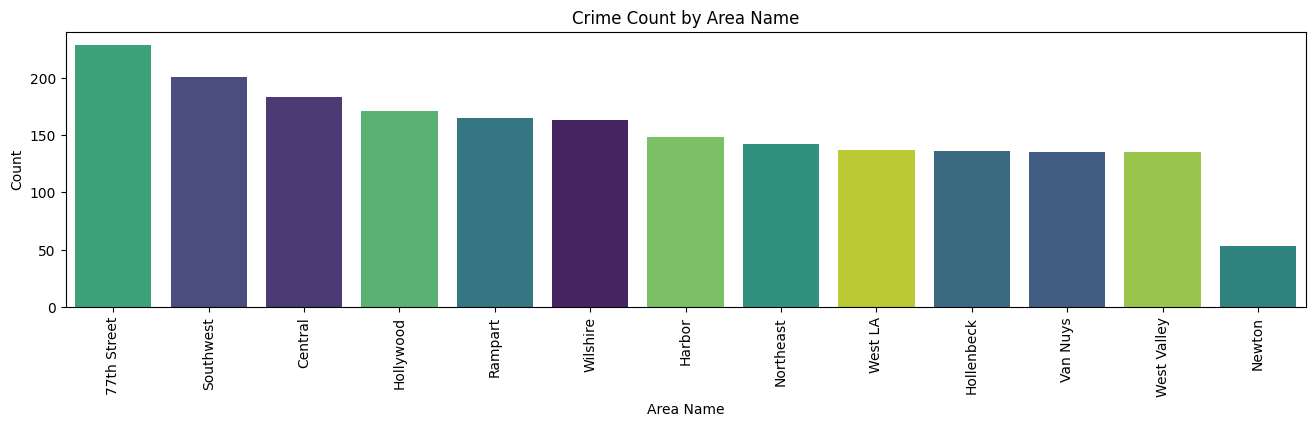

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DATE OCC to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Set up the plotting space
plt.figure(figsize=(16, 25))
plt.subplots_adjust(hspace=0.5)

# 1. Crime count by Area Name (Bar Plot)
plt.subplot(5, 1, 1)
sns.countplot(data=df, x="AREA NAME", hue="AREA NAME", palette="viridis", 
              order=df["AREA NAME"].value_counts().index, legend=False)
plt.title("Crime Count by Area Name")
plt.xlabel("Area Name")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Display the plot
plt.show()


Text(0, 0.5, 'Crime Description')

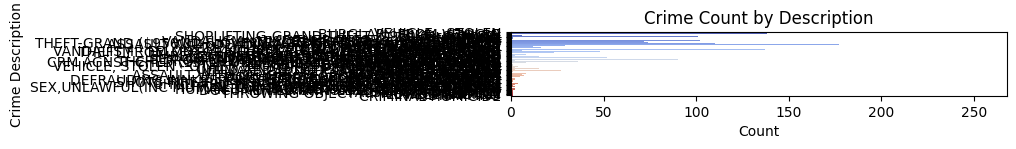

In [30]:
# 2. Crime count by Description (Horizontal Bar Plot)
plt.subplot(5, 1, 2)
sns.countplot(data=df, y="Crm Cd Desc", hue="Crm Cd Desc", palette="coolwarm", legend=False)
plt.title("Crime Count by Description")
plt.xlabel("Count")
plt.ylabel("Crime Description")


Text(0, 0.5, 'Frequency')

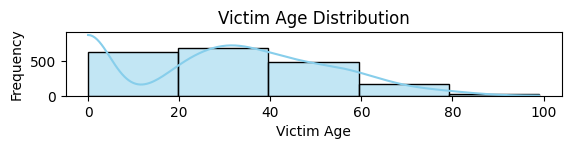

In [31]:
# 3. Victim Age Distribution (Histogram)
plt.subplot(5, 1, 3)
sns.histplot(df["Vict Age"], bins=5, kde=True, color="skyblue")
plt.title("Victim Age Distribution")
plt.xlabel("Victim Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Time of Day')

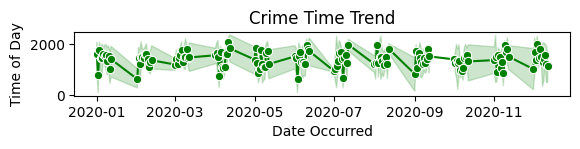

In [32]:

# 4. Crimes over Time (Line Plot)
plt.subplot(5, 1, 4)
df_sorted = df.sort_values("DATE OCC")
sns.lineplot(data=df_sorted, x="DATE OCC", y="TIME OCC", marker="o", color="green")
plt.title("Crime Time Trend")
plt.xlabel("Date Occurred")
plt.ylabel("Time of Day")

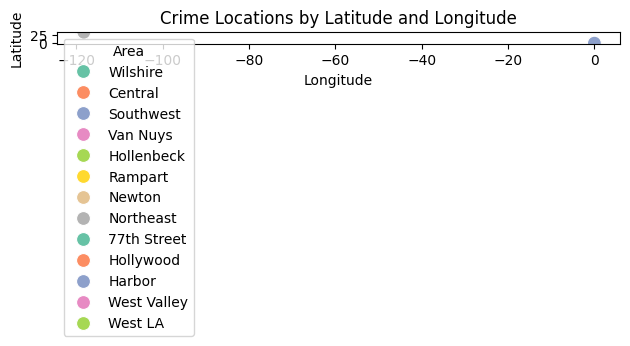

In [33]:
# 5. Crime Locations on Map (Scatter Plot)
plt.subplot(5, 1, 5)
sns.scatterplot(x=df["LON"], y=df["LAT"], hue=df["AREA NAME"], palette="Set2", s=100)
plt.title("Crime Locations by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Area")

# Show the plots
plt.tight_layout()
plt.show()